In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 导入训练集文件

In [21]:
data = pd.read_csv('ex2data1.txt', names=['Exam1', 'Exam2', 'Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 绘制训练集数据

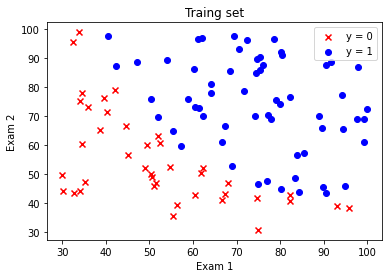

In [16]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Exam1'], data[data['Accepted'] == 0]['Exam2'], c='r', marker='x', label='y = 0')
ax.scatter(data[data['Accepted'] == 1]['Exam1'], data[data['Accepted'] == 1]['Exam2'], c='b', marker='o', label='y = 1')
ax.legend()
ax.set(xlabel = 'Exam 1', ylabel = 'Exam 2', title = 'Traing set')
plt.show()

## 获取X，y数据集，将X，y从data中分别取出来，并转换为矩阵返回

In [18]:
def get_X_y(data):
    data.insert(0, 'ones', 1)
    X_ = data.iloc[:, 0: -1]
    X = X_.values
    
    y_ = data.iloc[:, -1]
    y = y_.values.reshape(len(y_), 1)
    
    return X, y

In [19]:
X, y = get_X_y(data)

In [24]:
X.shape

(100, 3)

In [26]:
y.shape

(100, 1)

## 假设函数

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 代价函数

In [28]:
def costFunction(X, y, theta):
    g = sigmoid(X @ theta)
    first = y * np.log(g)
    second = (1 - y) * np.log(1 - g)
    
    return -np.sum(first + second) / len(X)

In [23]:
theta = np.zeros((3, 1))
theta.shape

(3, 1)

In [30]:
cost_init = costFunction(X, y, theta)
cost_init

0.6931471805599453

## 梯度下降法

In [31]:
def gradientDescent(X, y, theta, iters, alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        g = sigmoid(X @ theta)
        theta = theta - (alpha / m) * X.T @ (g - y)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
            
    return costs, theta

In [38]:
alpha = 0.001
iters = 800000

In [39]:
costs, theta_final = gradientDescent(X, y, theta, iters, alpha) 

0.6982906893667754
0.6249809656502034
0.6202288528925708
0.6155580289027095
0.610967112922575
0.6064547313159181
0.6020195186760546
0.5976601188684052
0.5933751860082078
0.5891633853740796
0.5850233942583292
0.5809539027551395
0.5769536144879259
0.5730212472773499
0.5691555337516023
0.565355221900709
0.5616190755767072
0.5579458749416336
0.5543344168653271
0.5507835152751102
0.5472920014594446
0.5438587243276773
0.5404825506280069
0.5371623651257984
0.5338970707443537
0.5306855886702351
0.527526858425195
0.5244198379067339
0.5213635033992642
0.5183568495578019
0.5153988893660557
0.512488654070724
0.5096251930937505
0.5068075739242157
0.5040348819914882
0.5013062205211783
0.4986207103753808
0.4959774898786138
0.4933757146308029
0.4908145573085821
0.48829320745612376
0.485810871266638
0.4833667713556281
0.480960146526905
0.4785902515323305
0.476256356826174
0.4739577483149293
0.4716937271033683
0.46946360923757036
0.46726672544559855
0.46510242087646214
0.4629700548379436
0.4608690005338

0.25972049481675796
0.2595898995815265
0.2594598103877595
0.2593302242971733
0.2592011383944963
0.2590725497872427
0.258944455605488
0.25881685300164886
0.2586897391502624
0.25856311124777315
0.2584369665123176
0.2583113021835141
0.25818611552225296
0.25806140381049253
0.2579371643510543
0.2578133944674216
0.2576900915035405
0.2575672528236241
0.2574448758119559
0.25732295787270143
0.2572014964297149
0.2570804889263526
0.2569599328252872
0.25683982560832436
0.25672016477622195
0.2566009478485088
0.2564821723633093
0.2563638358771674
0.256245935964874
0.25612847021929375
0.25601143625119777
0.25589483168909427
0.25577865417906503
0.2556629013845993
0.25554757098643394
0.25543266068239207
0.2553181681872247
0.2552040912324555
0.2550904275662236
0.2549771749531333
0.2548643311740993
0.2547518940262009
0.2546398613225308
0.25452823089204984
0.25441700057944205
0.254306168244971
0.2541957317643389
0.25408568902854567
0.2539760379437515
0.25386677643113753
0.25375790242677276
0.2536494138814

In [40]:
theta_final

array([[-14.19901753],
       [  0.11873862],
       [  0.1128433 ]])

In [41]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [42]:
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre == y)
acc

0.89

In [49]:
coef1 = -theta_final[0, 0] / theta_final[2, 0]
coef2 = -theta_final[1, 0] / theta_final[2, 0]

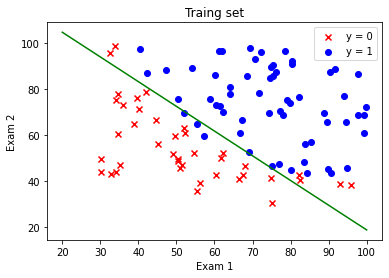

In [43]:
x = np.linspace(20, 100, 100)
f = coef1 + coef2 * x

fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Exam1'], data[data['Accepted'] == 0]['Exam2'], c='r', marker='x', label='y = 0')
ax.scatter(data[data['Accepted'] == 1]['Exam1'], data[data['Accepted'] == 1]['Exam2'], c='b', marker='o', label='y = 1')

ax.plot(x, f, c='g')

ax.legend()
ax.set(xlabel = 'Exam 1', ylabel = 'Exam 2', title = 'Traing set')
plt.show()